In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

input_folder = '/kaggle/input/plantvillage-dataset/color'
output_folder = '/kaggle/working/plantvillage-dataset-split'

train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

create_dir(train_dir)
create_dir(val_dir)
create_dir(test_dir)
for class_name in os.listdir(input_folder):
    class_dir = os.path.join(input_folder, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=1337)
        val_images, test_images = train_test_split(temp_images, test_size=(1/3), random_state=1337) 
        
        create_dir(os.path.join(train_dir, class_name))
        create_dir(os.path.join(val_dir, class_name))
        create_dir(os.path.join(test_dir, class_name))
        
        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))


In [3]:
train_path='/kaggle/working/plantvillage-dataset-split/train'

In [4]:
len(os.listdir(train_path))

38

In [5]:
all=0
data=os.listdir(train_path)
for d in data:
    all=all+len(os.listdir(train_path+'/'+d))

In [9]:
all

37998

In [6]:
all=0
data=os.listdir(train_path)
val_path='/kaggle/working/plantvillage-dataset-split/val'
for d in data:
    all=all+len(os.listdir(val_path+'/'+d))

In [11]:
all

10859

In [7]:
all=0
data=os.listdir(train_path)
test_path='/kaggle/working/plantvillage-dataset-split/test'
for d in data:
    all=all+len(os.listdir(test_path+'/'+d))

In [13]:
all

5448

In [15]:
cl=os.listdir(train_path)

In [16]:
cl

['Tomato___Tomato_mosaic_virus',
 'Apple___Black_rot',
 'Tomato___Bacterial_spot',
 'Blueberry___healthy',
 'Grape___Black_rot',
 'Pepper,_bell___Bacterial_spot',
 'Grape___Esca_(Black_Measles)',
 'Tomato___Early_blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy',
 'Tomato___Septoria_leaf_spot',
 'Soybean___healthy',
 'Tomato___Target_Spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Pepper,_bell___healthy',
 'Potato___Late_blight',
 'Potato___Early_blight',
 'Grape___healthy',
 'Corn_(maize)___healthy',
 'Raspberry___healthy',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Common_rust_',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Strawberry___healthy',
 'Tomato___Late_blight',
 'Apple___healthy',
 'Tomato___Leaf_Mold',
 'Peach___Bacterial_spot',
 'Potato___healthy',
 'Squash___Powdery_mildew',
 'Cherry_(inclu

In [ ]:
dim1=[]
dim2=[]
for x in cl:
    path=train_path+'/'+x
    im=os.listdir(path)
    for xx in im:
      img=imread(path+'/'+xx)     
      d1,d2,colors=img.shape
      dim1.append(d1)
      dim2.append(d2)

In [ ]:
np.mean(dim1)

In [ ]:
np.mean(dim2)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-08-11 19:50:39.785484: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 19:50:39.785600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 19:50:39.937583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
image_gen =ImageDataGenerator(rotation_range=40,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [10]:
val_test_gen=ImageDataGenerator(rescale=1/255)

In [78]:
 path=test_path+'/Peach___healthy'

In [79]:
imgtest=imread(path+'/'+os.listdir(path)[10])

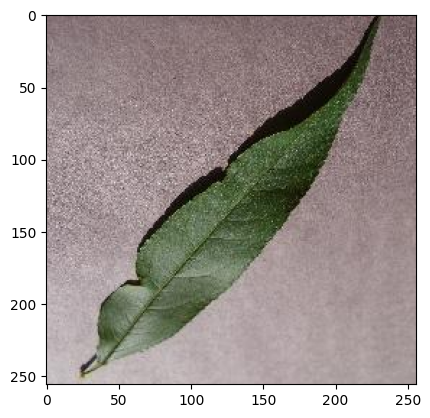

In [80]:
plt.imshow(imgtest)

In [ ]:
plt.imshow(image_gen.random_transform(imgtest))

In [ ]:
plt.imshow(image_gen.random_transform(imgtest))

In [ ]:
plt.imshow(image_gen.random_transform(imgtest))

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, InceptionResNetV2, DenseNet201, EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,MaxPool2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam

In [12]:
val_data_gen = val_test_gen.flow_from_directory(
    val_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

test_data_gen = val_test_gen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

Found 10859 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


In [13]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                                color_mode='rgb',
                                               batch_size=32,
                                               class_mode='categorical')

Found 37998 images belonging to 38 classes.


In [26]:
train_image_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [14]:
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_image_gen.classes),
    y=train_image_gen.classes
)

class_weights = dict(enumerate(class_weights))
class_weights

{0: 2.2674543501611173,
 1: 2.3040261945185545,
 2: 5.208059210526316,
 3: 0.8687640038410536,
 4: 0.9514247082978616,
 5: 1.3586241418764302,
 6: 1.6749537159481618,
 7: 2.7853687142647705,
 8: 1.1989776599772812,
 9: 1.4513024215109618,
 10: 1.229947562633521,
 11: 1.210590034408054,
 12: 1.0330034797738148,
 13: 1.3279513524847977,
 14: 3.3782005689900427,
 15: 0.259457023461612,
 16: 0.6222447843317067,
 17: 3.968045112781955,
 18: 1.4346447179642074,
 19: 0.9670670874478265,
 20: 1.4284962406015038,
 21: 1.4284962406015038,
 22: 9.433465739821251,
 23: 3.8608006502743346,
 24: 0.28064759147377283,
 25: 0.778775209050664,
 26: 1.2885919696147585,
 27: 3.134631248968817,
 28: 0.6720076400679117,
 29: 1.4284962406015038,
 30: 0.7484635991175543,
 31: 1.5014224751066856,
 32: 0.8070600229387027,
 33: 0.852470049804819,
 34: 1.01827634258763,
 35: 0.2667237579143912,
 36: 3.8312159709618876,
 37: 0.8984253085544048}

In [49]:
from tensorflow.keras import layers, models, applications
import tensorflow as tf

base_model = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(38, activation='softmax')(x)  

model = models.Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 4,114,022 (15.69 MB)

 Trainable params: 1,856,038 (7.08 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)
his=model.fit(
    train_image_gen,
    epochs=50,
    validation_data=val_data_gen,
    class_weight=class_weights,
    callbacks=[early_stop]
)

In [ ]:
metric=pd.DataFrame(his.history)
metric[['loss','val_loss']].plot()

In [ ]:
metric[['accuracy','val_accuracy']].plot()

In [ ]:
#prediction=model.predict(test_data_gen)

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrixr

In [ ]:
#cm = confusion_matrix(test_data_gen.classes, prediction)

#plt.figure(figsize=(38, 38))

#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicted Class')
#plt.ylabel('True Class')
#plt.show()

In [ ]:
#print(classification_report(test_data_gen.classes,prediction))

In [81]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.image import resize

imgtest_resized = resize(imgtest, (224, 224))
imgtest_resized = np.expand_dims(imgtest_resized, axis=0)
imgtest_resized = imgtest_resized / 255.0
prediction = model.predict(imgtest_resized)
predicted_class = np.argmax(prediction, axis=1)
print(f"Classe prédite : {predicted_class[0]}")
print(f"Probabilités : {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prédite : 17
Probabilités : [[6.1200323e-10 1.6025574e-08 1.0827777e-12 6.6194666e-06 2.1981569e-07
  3.0143110e-07 1.0878351e-08 4.5861660e-14 5.8738871e-19 1.0711356e-11
  4.0462980e-10 1.1419828e-15 3.0266967e-13 3.9899222e-18 4.7257734e-15
  3.6950465e-07 1.2308182e-04 9.9986589e-01 1.0713820e-09 1.0136722e-06
  1.5516029e-15 6.9141137e-11 6.5335736e-12 3.2072439e-08 2.8072230e-07
  6.0494372e-13 2.8197908e-22 1.9991597e-12 2.0503519e-11 2.3995448e-09
  2.7183611e-07 1.8437426e-06 2.2027817e-09 3.7228958e-08 2.6122374e-10
  1.5890513e-09 3.5185102e-10 1.0513456e-08]]


In [ ]:
from tensorflow.keras.models import load_model
model.save('modelmobilenet.h5')

In [ ]:
from tensorflow.keras.models import load_model
model.save('modelmobilene.keras')

In [53]:
os.listdir(test_path+'/Apple___Apple_scab')

['f8ef99d9-9d01-4aeb-9248-e8c312c9a981___FREC_Scab 3129.JPG',
 '0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG',
 'e5d9029b-ba16-44c2-be95-66199f1a8a96___FREC_Scab 3317.JPG',
 '4e770559-e332-470e-aae3-c7ad0399dd20___FREC_Scab 3513.JPG',
 'e2746374-a734-4d96-9dc8-503fbd35effa___FREC_Scab 2979.JPG',
 '88b51f59-08ed-41fe-8402-69f0964f87fe___FREC_Scab 3299.JPG',
 '80ddd81b-9c75-4711-8012-7ee68af378db___FREC_Scab 3458.JPG',
 '470bece4-7eb2-4ec1-917a-278559afe463___FREC_Scab 3250.JPG',
 '1a304331-98b5-473f-bbb1-c33b8441052a___FREC_Scab 3296.JPG',
 '0d8d5b80-962d-4381-8d3b-9eca3f2f1bb0___FREC_Scab 3449.JPG',
 'ef359032-085f-44ba-a63d-493a1724eca4___FREC_Scab 3202.JPG',
 'ba94f188-df0b-41fd-94e3-f0ed4924e23e___FREC_Scab 3102.JPG',
 '2dd8b8f8-46b0-4bc6-b817-ea7163f4b28b___FREC_Scab 3473.JPG',
 '2d329823-7ad5-4189-89b7-4bdf24f9c393___FREC_Scab 3507.JPG',
 '6a19d31f-b5e3-4732-a82c-e3d5b1d26c60___FREC_Scab 3537.JPG',
 'fbd09d7f-e816-408a-946e-e4009ec8cae1___FREC_Scab 3289.JPG',
 '7edff1

**mobnetv2**

In [2]:
from tensorflow.keras.models import load_model
model=load_model('/kaggle/input/modelmobnet/tensorflow2/default/1/modelmobilene.keras')

2024-08-11 17:53:58.416894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 17:53:58.417011: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 17:53:58.546307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [117]:
val_loss, val_accuracy = model.evaluate(val_data_gen, steps=val_data_gen.samples // 32)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.9145 - loss: 0.2815
Validation Accuracy: 91.47%


**effnetb0**

In [15]:
from tensorflow.keras.models import load_model
model=load_model('/kaggle/input/modelt/tensorflow2/default/1/modeleff.h5')

In [18]:
val_loss, val_accuracy = model.evaluate(val_data_gen, steps=val_data_gen.samples // 32)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.9820 - loss: 0.3531
Validation Accuracy: 98.43%


In [113]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.image import resize

imgtest_resized = resize(imgtest, (224, 224))
imgtest_resized = np.expand_dims(imgtest_resized, axis=0)
imgtest_resized = imgtest_resized / 255.0
prediction = model.predict(imgtest_resized)
predicted_class = np.argmax(prediction, axis=1)
print(f"Classe prédite : {predicted_class[0]}")
print(f"Probabilités : {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prédite : 17
Probabilités : [[6.1200323e-10 1.6025574e-08 1.0827777e-12 6.6194666e-06 2.1981569e-07
  3.0143110e-07 1.0878351e-08 4.5861660e-14 5.8738871e-19 1.0711356e-11
  4.0462980e-10 1.1419828e-15 3.0266967e-13 3.9899222e-18 4.7257734e-15
  3.6950465e-07 1.2308182e-04 9.9986589e-01 1.0713820e-09 1.0136722e-06
  1.5516029e-15 6.9141137e-11 6.5335736e-12 3.2072439e-08 2.8072230e-07
  6.0494372e-13 2.8197908e-22 1.9991597e-12 2.0503519e-11 2.3995448e-09
  2.7183611e-07 1.8437426e-06 2.2027817e-09 3.7228958e-08 2.6122374e-10
  1.5890513e-09 3.5185102e-10 1.0513456e-08]]
